In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_json("train.json")

In [3]:
df.head(19)     # seven rows 

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [4]:
df.info()    #cuisine and ingredients are non-integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 621.5+ KB


Text(0.5, 1.0, 'Cuisine Distribution')

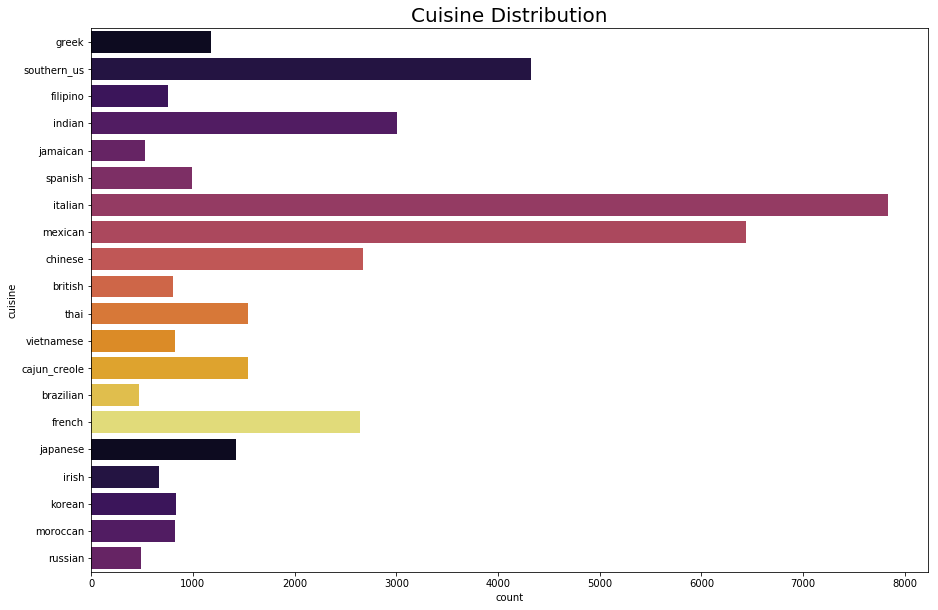

In [5]:
sns.countplot(y='cuisine', data=df,palette=sns.color_palette('inferno',15))###
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

In [6]:
df['ingredients'].head(4)

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
Name: ingredients, dtype: object

In [7]:
X=df[['ingredients']]
y=df[['cuisine']]
z=df[['id']]

unique_list=[]
unique_list=df['id']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0) 

In [9]:
train_ingredients_text = X_train['ingredients'].apply(lambda s: ' '.join(w.lower() for w in s)).str.replace('[^\w\s]','')

In [10]:
test_ingredients_text = X_test['ingredients'].apply(lambda s: ' '.join(w.lower() for w in s)).str.replace('[^\w\s]','')  

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf.fit(train_ingredients_text)
text = tfidf.transform(train_ingredients_text)

In [12]:
traintext = tfidf.transform(test_ingredients_text)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=16,random_state=0)
clf.fit(text, y_train)

c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
tf=clf.predict(traintext)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, tf)

0.6060339409176618

In [17]:
# Decision Tree

In [18]:
from sklearn import tree

In [19]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(text, y_train)

In [20]:
tf1=clf1.predict(traintext)
tf1

array(['italian', 'indian', 'indian', ..., 'korean', 'chinese', 'italian'],
      dtype=object)

In [21]:
accuracy_score(y_test, tf1)

0.6197360150848523

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
clf2 = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5)
clf2.fit(text, y_train) 

c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=5, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
tf2=clf2.predict(traintext)

In [25]:
accuracy_score(y_test, tf2)

0.793463230672533

In [26]:
from sklearn.naive_bayes import MultinomialNB 
clf3 = MultinomialNB()

In [27]:
clf3.fit(text, y_train)

c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
tf3=clf3.predict(traintext)

In [29]:
accuracy_score(y_test, tf3)

0.6799497171590195

In [30]:
from sklearn.ensemble import VotingClassifier

In [31]:
eclf1 = VotingClassifier(estimators=[ ('randomforest', clf), ('decisiontree', clf1), ('sgd', clf2),('NB',clf3)], voting='soft').fit(text,y_train)

c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\karachi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3

In [32]:
Y1_hat = eclf1.predict(traintext)

In [33]:
accuracy_score(y_test, Y1_hat)

0.7296040226272784

In [34]:
#for x in range(len(X_test)):
 #   print(unique_list[x],tf[x])

In [35]:
df1=pd.read_json("test.json")   #reading test.json file 
print(len(df1))
unique=[]     #list 

9944


In [36]:
unique=df1['id']     #storing id into the list 

In [37]:
df1['ingredients'].head(7)

0    [baking powder, eggs, all-purpose flour, raisi...
1    [sugar, egg yolks, corn starch, cream of tarta...
2    [sausage links, fennel bulb, fronds, olive oil...
3    [meat cuts, file powder, smoked sausage, okra,...
4    [ground black pepper, salt, sausage casings, l...
5    [baking powder, all-purpose flour, peach slice...
6               [grape juice, orange, white zinfandel]
Name: ingredients, dtype: object

In [59]:
data = df1['ingredients'].apply(lambda s: ' '.join(w.lower() for w in s)).str.replace('[^\w\s]','')  

In [60]:
data1=tfidf.transform(data)

In [61]:
Y2_hat=clf2.predict(data1)

In [71]:
result=[]
for x in range(len(data)):
    #print(unique[x],Y2_hat[x])
    if(Y2_hat[x]=='italian'):
        print(unique[x],Y2_hat[x])
        result.append(unique[x])
        result.append(Y2_hat[x])
         

41580 italian
35687 italian
21749 italian
44883 italian
16585 italian
47520 italian
7050 italian
22437 italian
32935 italian
30512 italian
26197 italian
46323 italian
22562 italian
11358 italian
45832 italian
9126 italian
36125 italian
15419 italian
13900 italian
22290 italian
28464 italian
2329 italian
16675 italian
9872 italian
5592 italian
40754 italian
19611 italian
817 italian
5892 italian
676 italian
21891 italian
14630 italian
13046 italian
29184 italian
34783 italian
9365 italian
46545 italian
9900 italian
39690 italian
989 italian
10474 italian
20860 italian
42494 italian
40093 italian
182 italian
44575 italian
14989 italian
13270 italian
25529 italian
13523 italian
41270 italian
27935 italian
33856 italian
30198 italian
42521 italian
4594 italian
15737 italian
1119 italian
27653 italian
49509 italian
21302 italian
7935 italian
25113 italian
45523 italian
13797 italian
29477 italian
7316 italian
16525 italian
28772 italian
13720 italian
40376 italian
40854 italian
20571 italia

15963 italian
45075 italian
2588 italian
41667 italian
20551 italian
18 italian
25020 italian
21625 italian
8216 italian
21240 italian
24128 italian
22385 italian
16051 italian
45464 italian
8956 italian
23386 italian
49705 italian
40336 italian
21666 italian
44202 italian
37601 italian
6034 italian
40788 italian
4679 italian
33316 italian
5182 italian
21953 italian
26636 italian
27428 italian
29136 italian
15973 italian
822 italian
13536 italian
2110 italian
43783 italian
31016 italian
48972 italian
38205 italian
48460 italian
23742 italian
45577 italian
16115 italian
30854 italian
8225 italian
34363 italian
22164 italian
34349 italian
6049 italian
19836 italian
33934 italian
27005 italian
26414 italian
46511 italian
43589 italian
23900 italian
18195 italian
2308 italian
20940 italian
12360 italian
18138 italian
16111 italian
14985 italian
14497 italian
17155 italian
14669 italian
28371 italian
33112 italian
49146 italian
10502 italian
23099 italian
49125 italian
28073 italian
37462 i

26361 italian
6523 italian
17391 italian
44894 italian
24454 italian
49099 italian
47952 italian
49425 italian
10148 italian
49688 italian
11581 italian
45144 italian
24289 italian
29505 italian
39846 italian
48530 italian
27744 italian
19893 italian
30024 italian
13702 italian
33714 italian
37356 italian
7936 italian
25722 italian
34145 italian
15874 italian
14347 italian
4188 italian
7989 italian
29341 italian
7100 italian
24306 italian
16615 italian
5238 italian
44987 italian
48635 italian
47306 italian
24211 italian
23532 italian
36187 italian
32182 italian
5184 italian
48476 italian
13850 italian
3190 italian
6042 italian
45948 italian
46370 italian
41226 italian
16523 italian
6583 italian
19909 italian
15028 italian
391 italian
15215 italian
24333 italian
20010 italian
32819 italian
33992 italian
36568 italian
42268 italian
48580 italian
12219 italian
41593 italian
22886 italian
12617 italian
40847 italian
6802 italian
29024 italian
8300 italian
47035 italian
22339 italian


In [69]:
filename='submission.csv'

result.to_csv(filename,header=True)

AttributeError: 'list' object has no attribute 'to_csv'